In [17]:
import sys
print(sys.executable)

C:\Miniconda\envs\time_series_env\python.exe


In [58]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm

In [19]:
def wrangle(path):
    
    # read the csv file
    df = pd.read_csv(path, index_col='InvoiceDate', parse_dates=['InvoiceDate'])

    # create the revenue col
    df['Revenue'] = df['Quantity'] * df['UnitPrice']

    # drop unecessary cols
    df.drop(columns=['Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country'], inplace=True)

    # resample to daily freq
    df = df.resample('D').mean().dropna()

    # return the transformed df
    return df

In [20]:
df = wrangle("C:/Users/HP PROBOOK/Documents/Cardio/Analysis/Online_Retail.csv")
df.head()

,Revenue
InvoiceDate,
2010-12-01,18.866010
2010-12-02,21.909569
2010-12-03,20.717738
2010-12-05,11.517046
2010-12-06,13.888649


<Axes: xlabel='InvoiceDate'>

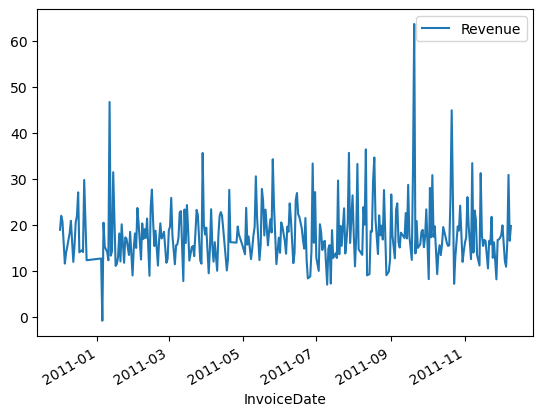

In [21]:
df.plot()

In [22]:
adfuller(df)

(np.float64(-4.518185855518255),
 np.float64(0.00018228498361180445),
 11,
 293,
 {'1%': np.float64(-3.452867117291862),
  '5%': np.float64(-2.8714554160827745),
  '10%': np.float64(-2.5720532321867466)},
 np.float64(1917.904555639304))

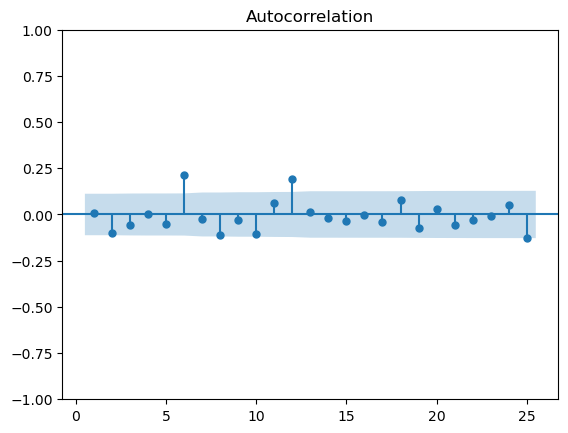

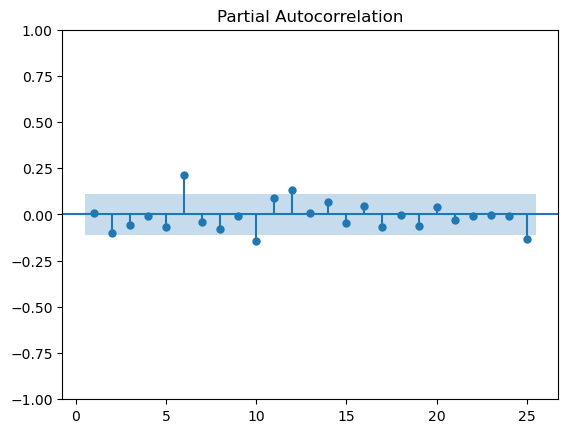

In [23]:
plot_acf(df, lags=25, zero=False)
plot_pacf(df, lags=25, zero=False)
plt.show()

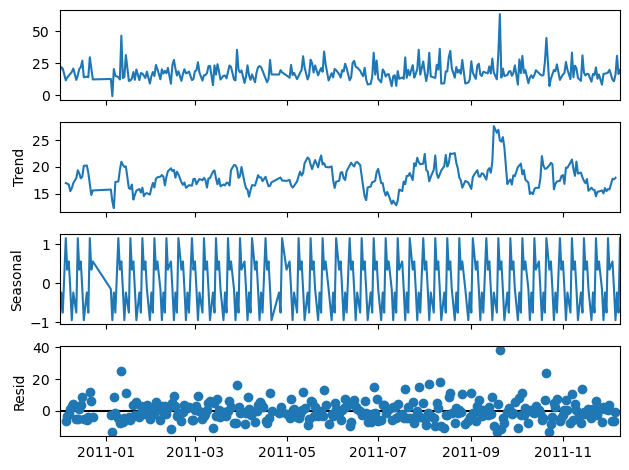

In [24]:
decomp_results = seasonal_decompose(df, period=7)
decomp_results.plot()
plt.show()

In [51]:
model = SARIMAX(
    np.log(df),
    order =(1,0,1),
    seasonal_order=(1,0,1,7)
)

results = model.fit()
forecast = results.get_forecast(steps=30)
forecast.predicted_mean

C:\Miniconda\envs\time_series_env\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Miniconda\envs\time_series_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Miniconda\envs\time_series_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Miniconda\envs\time_series_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Miniconda\envs\time_series_env\Lib\site-packages\statsmodels\t

305    2.841378
306    2.851744
307    2.836260
308    2.832723
309    2.845350
310    2.836914
311    2.861910
312    2.841395
313    2.851759
314    2.836279
315    2.832742
316    2.845366
317    2.836932
318    2.861922
319    2.841412
320    2.851774
321    2.836297
322    2.832761
323    2.845382
324    2.836950
325    2.861935
326    2.841429
327    2.851788
328    2.836315
329    2.832779
330    2.845398
331    2.836968
332    2.861947
333    2.841445
334    2.851803
Name: predicted_mean, dtype: float64

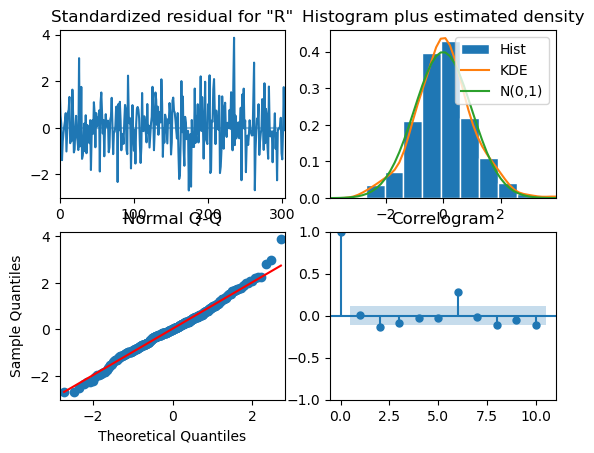

In [56]:
results.plot_diagnostics()
plt.show()

In [ ]:
# model = pm.auto_arima(
#     df, 
#     d=0,
#     start_p=1,
#     start_q=1,
#     max_p=4,
#     max_q=4,
#     seasonal=True,
#     m=7,
#     D=1,
#     start_P=1,
#     start_Q=1,
#     max_P=4,
#     max_Q=4,
#     information_criterion='aic',
#     trace=True,
#     error_action='ignore',
#     step_wise=True
# )

# model

In [57]:
model.plot_diagnostics()

AttributeError: 'SARIMAX' object has no attribute 'plot_diagnostics'

In [29]:
results = order_search.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                  305
Model:             SARIMAX(4, 1, 0, 7)   Log Likelihood               -1028.005
Date:                 Mon, 07 Jul 2025   AIC                           2066.010
Time:                         15:42:20   BIC                           2084.495
Sample:                              0   HQIC                          2073.409
                                 - 305                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.7698      0.052    -14.848      0.000      -0.871      -0.668
ar.S.L14      -0.5548      0.067     -8.227      0.000      -0.687      -0.423
ar.S.L21      -0.3954      0.063     -6.306      0.000      -0.518      -0.273
ar.S.L28      -0.2368      0.054     -4.381      0.000      -0.343      -0.131
sigma2        56.8939      2.894     19.659      0.000      51.222      62.566
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               277.54
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                             1.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         7.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# saving the model

joblib.dump(model, online_retails_forecast.pkl)